# 딥러닝 - 이미지를 위한 인공 신경망

# 합성곱 신경망의 구성 요소

## 키워드 정리

- **합성곱**
    - 이미지의 지역적인 특징(특성)을 추출하기 위한 연산 방법
    - 밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산
    - 하지만 밀집층과 달리 각 합성곱은 입력 전체가 아니라 **일부만 사용**하여 선형 계산을 수행함
    > <span style="font-size:20px;"><b>왜 사용하는가?</b></span>\
    전체 이미지를 한꺼번에 처리하는 대신, 작은 영역에서 중요한 특징을 추출해 학습의 효율을 높임.\
    같은 필터를 전체 이미지에 공유하기 때문에, 파라미터 수를 줄이고 일반화 성능도 좋아짐.\
    이후 단계(예: 분류기)에 전달할 중요한 특징들을 자동으로 학습할 수 있다.\
    궁극적으로 합성곱을 통해 <span style="color:violet"><b>각 필터(커널)의 가중치들과 절편을 구하는 것이 목적</b></span>이다.
    
- **필터**
    - 필터(커널): 특성맵을 만들기 위해 가중치와 절편을 모아놓은 것
    - 합성곱 층의 필터는 밀집층의 뉴런에 해당함
    - 필터의 가중치와 절편을 종종 **커널**이라고 부름
    - 자주 사용되는 커널의 크기는 (3,3) 또는 (5,5)
    - 커널의 깊이는 입력의 깊이와 같다

- **특성 맵**
    - 합성곱 층이나 풀링 층의 출력 배열을 의미함
    - **필터 하나**가 **하나의 특성 맵**을 만든다. 즉, `필터의 개수 = 특성맵의 개수`\
    ex) 합성곱 층에서 5개의 필터를 적용하면 5개의 특성 맵이 만들어짐

- **패딩**
    - 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀
    - **밸리드 패딩**: 패딩을 사용하지 않는 것
    - **세임 패딩(Same Padding)**: 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것\
    즉, `이미지(입력) 크기 = 특성맵(출력) 크기`로 만드는 것

- **스트라이드**
    - 합성곱 층에서 필터가 입력 위를 이동하는 크기
    - 일반적으로 스트라이드는 1픽셀을 사용함

- **풀링**
    - 특성맵에서 **대표값**을 가져와서 차원 축소
    - 풀링은 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할을 수행
    - 대표적으로 최대 풀링과 평균 풀링이 있으며 (2, 2) 풀링으로 입력을 절반으로 줄임
    - 방식:
        - max pooling😀: <span style="color:limegreen"><u>최댓값</u></span>이 대표값
        - min pooling: <span style="color:limegreen"><u>최솟값</u></span>이 대표값
        - average pooling: <span style="color:limegreen"><u>평균</u></span>이 대표값
    - 장점: 전체적으로 볼 수 있고, 양이 줄어 학습의 효율이 올라감

- **합성곱**
    - 합성곱(convolution)은 마치 입력 데이터에 마법의 도장을 찍어서 **유용한 특성만 드러나게 하는 것**으로 비유할 수 있다
    - 합성곱의 동작 원리는 아래와 같다

## 합성곱의 동작 원리

<div align="center">
    <br>
    <img src="../lecture_images/day11_dl_convolution_1.png" alt="convolution1" width="700"/>
</div>

### 그림 설명
- 왼쪽 아래 행렬: 이미지
- 3D 구조: 필터, 커널 (필터의 사이즈(개수)는 하이퍼파라미터, 일반적으로는 32, 64, 128, ... / 커널의 사이즈(3*3)도 하이퍼파라미터)

### 특성맵 만드는 과정
- 필터의 크기만큼(3*3) 이동하며 필터의 가중치를 같은 위치의 픽셀값끼리 곱해서 더한다. → 하나의 특성
$$
3 \times w_1 + 1 \times w_2 + 0 \times w_3 + 6 \times w_4 + 4 \times w_5 + 8 \times w_6 + 4 \times w_7 + 5 \times w_8 + 1 \times w_9 + b
$$
- 위의 과정을 총 4번 할 것이다. → 특성맵
```text
[예시 그림]

   특성맵
┌────┬────┐
│  7 │ 10 │
├────┼────┤
│ 20 │  3 │
└────┴────┘
```
- 필터(커널)의 가중치는 **학습**을 통해 **경사 하강법(GD)**으로 loss를 구하고 지속적으로 업데이트된다.
- 풀링을 통해 차원 축소 (보통 반으로 줄어듦)
```text
[예시 그림]
max pooling: 일반적인 방법

   특성맵         풀링 후
┌────┬────┐
│  7 │ 10 │      ┌────┐
├────┼────┤  ->  │ 20 │
│ 20 │  3 │      └────┘
└────┴────┘
```
- 패딩을 통해 입력 차원(이미지)와 출력 차원(특성맵)을 같게 만들어 준다.\
모서리 부분을 좀 더 면밀하게 학습할 수 있다

```text
[예시 그림]

0. 이미지 입력 및 필터 설정
이미지 크기: 3 x 3
필터 크기: 2 x 2

[입력 이미지 예시]
┌────┬────┬────┐
│  7 │ 10 │  5 │
├────┼────┼────┤
│ 20 │  3 │  6 │
├────┼────┼────┤
│  9 │ 43 │ 39 │
└────┴────┴────┘

1-1. 그대로 합성곱을 하면?
이미지 크기: 3 x 3
특성맵 크기: 2 x 2

문제점❗
- 모서리 픽셀(7, 5, 9, 39)은 딱 한 번만 필터에 포함됨
- 중앙 쪽 픽셀값(3)은 무려 4번이나 반복 검증됨
→ 가장자리 정보가 충분히 반영되지 않는다

1-2. 패딩을 넣어주면?
이미지 크기: 3 x 3 → 5 x 5
특성맵 크기: 3 x 3

장점✨
- 모서리 픽셀(7, 5, 9, 39)은 이제 2번씩 필터에 포함됨
- 중앙 픽셀(3)은 또 9번 검증되긴 하지만, 입력 이미지 크기가 커질수록 횟수가 줄어들 것이다
→ 가장자리 정보도 더 학습에 반영되므로, 전체 인식이 더 정교해졌다

2. 풀링하면?
특성맵 크기: 1 x 1

   입력 이미지            패딩이 추가된 입력 이미지             특성 맵             풀링 후
                      ┌────┬────┬────┬────┬────┐                 
                      │  0 │  0 │  0 │  0 │  0 │                            
┌────┬────┬────┐      ├────┼────┼────┼────┼────┤      ┌────┬────┬────┐
│  7 │ 10 │  5 │      │  0 │  7 │ 10 │  5 │  0 │      │ 20 │ 20 │ 10 │
├────┼────┼────┤      ├────┼────┼────┼────┼────┤      ├────┼────┼────┤        ┌────┐
│ 20 │  3 │  6 │  ->  │  0 │ 20 │  3 │  6 │  0 │  ->  │ 43 │ 43 │ 43 │   ->   │ 43 │
├────┼────┼────┤      ├────┼────┼────┼────┼────┤      ├────┼────┼────┤        └────┘
│  9 │ 43 │ 39 │      │  0 │  9 │ 43 │ 39 │  0 │      │ 43 │ 43 │ 43 │
└────┴────┴────┘      ├────┼────┼────┼────┼────┤      └────┴────┴────┘
                      │  0 │  0 │  0 │  0 │  0 │
                      └────┴────┴────┴────┴────┘
```

<div align="center">
    <br>
    <img src="../lecture_images/day11_dl_convolution_2.png" alt="convolution2" width="700"/>
</div>

# 합성곱 신경망을 사용한 이미지 분류
## 키워드 정리
- Tensorflow
Conv2D : 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스입니다.
첫 번째 매개변수는 합성곱 필터의 개수입니다.
kernel_size 매개변수는 필터의 커널 크기를 지정합니다. 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있습니다. 일반적으로 커널의 가로세로 크기는 동일합니다. 커널의 깊이는 입력의 깊이와 동일하게 때문에 따로 지정하지 않습니다.
strides 매개변수는 필터의 이동 간격을 지정합니다. 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있습니다. 일반적으로 가로세로 스트라이드 크기는 동일합니다. 기본값은 1입니다.
padding 매개변수는 입력의 패딩 타입을 지정합니다. 기본값 valid는 패딩을 하지 않습니다. same은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가합니다.
activation 매개변수는 합성곱 층에 적용할 활성화 함수를 지정합니다.
MaxPooling2D : 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스입니다.
첫 번째 매개변수는 풀링의 크기를 지정하며, 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있습니다. 일반적으로 풀링의 가로세로 크기는 같게 지정합니다.
strides 매개변수는 풀링의 이동 간격을 지정합니다. 기본값은 풀링의 크기와 동일합니다. 즉 입력 위를 겹쳐서 풀링하지 않습니다.
padding 매개변수는 입력의 패딩 타입을 지정합니다. 기본값은 valid는 패딩을 하지 않습니다. same은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가합니다.
plot_model() : 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 저장합니다.
첫 번째 매개변수에 케라스 모델 객체를 전달합니다.
to_file 매개변수에 파일 이름을 지정하면 그림을 파일로 저장합니다.
show_shapes 매개변수를 True로 지정하면 층의 입력, 출력 크기를 표시합니다. 기본값은 False입니다.
show_layer_names 매개변수를 True로 지정하면 층 이름을 출력합니다. 기본값이 True입니다.
matplotlib
**bar()**는 막대그래프를 출력합니다.
첫 번쨰 매개변수에 x축의 값을 리스트나 넘파이 배열로 전달합니다.
두 번째 매개변수에 막대의 y축 값을 리스트나 넘파이 배열로 전달합니다.
width 매개변수에서 막대의 두께를 지정할 수 있습니다. 기본값은 0.8입니다.

In [35]:
# Fashion MNIST 데이터 불러오기

import tensorflow as tf

(train_input, train_target), (test_input, test_target) =\
    tf.keras.datasets.fashion_mnist.load_data()

In [36]:
# Conv2D 데이터는 반드시 채널 차원 정보를 명시
train_input = train_input.reshape(-1, 28, 28, 1)  # 1: 흑백 채널 수, 3: 컬러 채널 수

In [37]:
# 정규화 (0~1)
train_scaled = train_input / 255.0

In [38]:
# 학습/검증 세트 분리

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [39]:
# 층 구성 (합성곱 + 은닉층 + 출력층)

model = tf.keras.Sequential()

# 입력 층
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))  # 합성곱 사용 시 채널 차원 지정이 필수! (1: 흑백)

# 합성곱 층 1
# : 필터 개수 32, 커널 사이즈 3x3, same padding 적용, 활성화 함수 relu
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'))

# 풀링 층 1
model.add(tf.keras.layers.MaxPooling2D())  # 풀링 크기 2x2 (기본값)

# 합성곱 층 2 - 모델의 신뢰성을 높이기 위해 합성곱 층 추가
# : 필터 개수 64, 커널 사이즈 3x3, same padding 적용, 활성화 함수 relu
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# 풀링 층 2
model.add(tf.keras.layers.MaxPooling2D())

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

- 합성곱 층 1
    - 커널 크기 = 3 x 3
    - 입력 채널 수 = 1 (흑백 채널)
    - 필터 개수 = 32
    - 총 커널 가중치 개수 = 3 x 3 x 1 x 32 = 288
    - 총 모델 파라미터 개수 = 커널 가중치 개수 + bias = 288 + 32 = 320
- 합성곱 층 2
    - 커널 크기 = 3 x 3
    - 입력 채널 수 = 32 (이전 층에서 넘어 온 출력 채널 수)
    - 필터 개수 = 64
    - 총 커널 가중치 개수 = 3 x 3 x 32 x 64 = 18,432
    - 총 모델 파라미터 개수 = 커널 가중치 개수 + bias = 18,432 + 64 = 18,496

In [40]:
# DNN(Deep Neural Network), FFNN(Feedforward Neural Network)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))  # 랜덤으로 은닉층 유닛을 꺼준다 (과적합 방지)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

- 합성곱 층 1
    - 커널 크기 = 3 x 3
    - 입력 채널 수 = 1 (흑백 채널)
    - 필터 개수 = 32
    - 총 커널 가중치 개수 = 3 x 3 x 1 x 32 = 288
    - 총 모델 파라미터 개수 = 커널 가중치 개수 + bias = 288 + 32 = 320

- 합성곱 층 2
    - 커널 크기 = 3 x 3
    - 입력 채널 수 = 32 (이전 층에서 넘어 온 출력 채널 수)
    - 필터 개수 = 64
    - 총 커널 가중치 개수 = 3 x 3 x 32 x 64 = 18,432
    - 총 모델 파라미터 개수 = 커널 가중치 개수 + bias = 18,432 + 64 = 18,496

- 은닉층
    - 3136 x 100 + 100 = 313,600 + 100 = 313,700

- 출력층
    - 100 x 10 + 10 = 1,000 + 10 = 1,010

- 총 모델 파라미터 개수: 320 + 18,496 + 313,700 + 1,010 = 333,526개

In [1]:
%pip install pydot
%pip install graphviz
# 설치하고 컴퓨터 재부팅 필요 - 아래 코드 실행시키기 위함

  Using cached pydot-4.0.1-py3-none-any.whl.metadata (11 kB)
Using cached pydot-4.0.1-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
# 훈련

# 컴파일 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 조기종료 설정 (ModelCheckpoint: 가장 적은 손실을 도출한 최적의 모델 저장, EarlyStopping: patience만큼 손실 상승을 참아줌)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

hist = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7536 - loss: 0.6754 - val_accuracy: 0.8772 - val_loss: 0.3243
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8805 - loss: 0.3324 - val_accuracy: 0.8998 - val_loss: 0.2707
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8966 - loss: 0.2823 - val_accuracy: 0.9022 - val_loss: 0.2568
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9086 - loss: 0.2505 - val_accuracy: 0.9100 - val_loss: 0.2473
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9176 - loss: 0.2217 - val_accuracy: 0.9112 - val_loss: 0.2370
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9263 - loss: 0.2002 - val_accuracy: 0.9198 - val_loss: 0.2244
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9340 - loss: 0.1795 - val_accuracy: 0.9165 - val_loss: 0.2242
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9397 - loss: 0.1625 - 

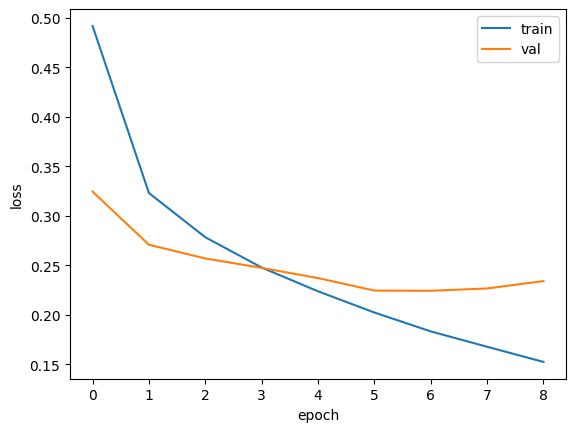

In [45]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

3 epochs 이후 과대적합이 일어난 것을 확인할 수 있다.

In [46]:
# 검증 세트로 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9197 - loss: 0.2179


[0.22420090436935425, 0.9164999723434448]

손실: 0.22
정확도: 0.92

In [47]:
# 테스트 세트로 최종 평가
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 0.2562


[0.24354052543640137, 0.9125000238418579]

손실: 0.24
정확도: 0.91

In [ ]:
# 실제로 이 모델을 가지고 예측해보자

import numpy as np

predictions = model.predict(test_scaled[:10])
# np.round(predictions, decimals=3)
np.argmax(predictions, axis=1)  # 예측 결과 인덱스

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

1이 많다 -> 확신에 가득 참